In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [3]:
brigades = pd.read_csv('brigades.csv')
workers = pd.read_csv('workers.csv')
services1 = pd.read_csv('services1.csv')
services2 = pd.read_csv('services2.csv')

services = pd.concat([services1,services2],ignore_index=True)
merged_data = pd.merge(brigades,workers, on='brigade_id')
merged_data = pd.merge(merged_data,services, on='employee_id')
merged_data


,brigade_id,brigade_name,tariff_per_hour,employee_id,last_name,date,spent_hours,car_brand
0,1,Бригада 1,20,101,Іванов,2024-01-01,2,Toyota
1,1,Бригада 1,20,101,Іванов,2024-01-03,4,Chevrolet
2,1,Бригада 1,20,102,Петров,2024-01-02,3,Ford
3,2,Бригада 2,25,103,Сидоров,2024-01-03,4,Chevrolet
4,2,Бригада 2,25,104,Коваленко,2024-01-01,2,Toyota
5,3,Бригада 3,18,105,Сергієнко,2024-01-02,3,Ford


In [4]:
#(а) таблицю, в якiй для кожної бригади пораховано заробленi кошти за весь час;
merged_data['total'] = merged_data['spent_hours'] * merged_data['tariff_per_hour']
brigade_total = merged_data.groupby('brigade_name')['total'].sum().reset_index()
brigade_total


,brigade_name,total
0,Бригада 1,180
1,Бригада 2,150
2,Бригада 3,54


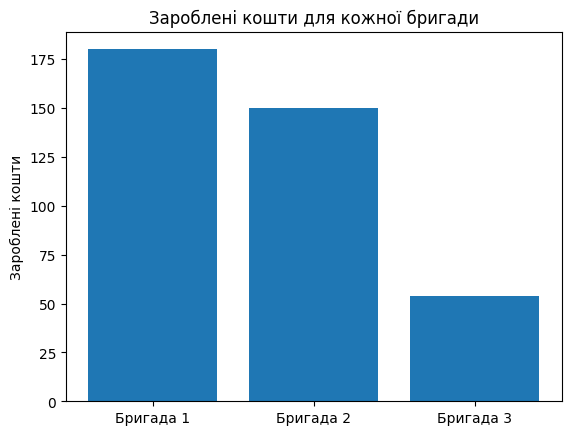

In [5]:
# (б) Діаграма зароблених коштів для кожної бригади
plt.bar(brigade_total['brigade_name'],brigade_total['total'])
plt.title('Зароблені кошти для кожної бригади')
plt.ylabel('Зароблені кошти')
plt.show()


In [6]:
start_date_widget = widgets.DatePicker(description='Початкова дата',value=pd.to_datetime(merged_data['date']).min())
end_date_widget = widgets.DatePicker(description='Кінцева дата',value=pd.to_datetime(merged_data['date']).max())

display(start_date_widget)
display(end_date_widget)

DatePicker(value=Timestamp('2024-01-01 00:00:00'), description='Початкова дата', step=1)

DatePicker(value=Timestamp('2024-01-03 00:00:00'), description='Кінцева дата', step=1)

In [9]:
# (в) Таблиця для кожного працівника з заробленими коштами за період часу
print(start_date_widget.value)
print(end_date_widget.value)

selected_data = merged_data[(pd.to_datetime(merged_data['date']) >= pd.to_datetime(start_date_widget.value)) & (pd.to_datetime(merged_data['date']) <= pd.to_datetime(end_date_widget.value))]

worker_total = selected_data.groupby(['last_name'])['total'].sum().reset_index()
worker_total


2024-01-01 00:00:00
2024-01-03 00:00:00


,last_name,total
0,Іванов,120
1,Коваленко,50
2,Петров,60
3,Сергієнко,54
4,Сидоров,100


In [8]:
# (г) таблицю, в якiй подано заробленi кошти на кожнiй марцi авто- мобiлiв, впорядкованi за цiєю сумою.
erned_by_car = selected_data.groupby(['car_brand'])['total'].sum().reset_index()
erned_by_car = erned_by_car.sort_values('total',ascending=True)
erned_by_car

,car_brand,total
2,Toyota,90
1,Ford,114
0,Chevrolet,180
